### Some initializations

In [1]:
import json

import numpy as np
import pandas as pd
import seaborn as sb

from matplotlib.colors import LogNorm
%matplotlib inline

import pylab 
import scipy.stats as stats

from trainer import hparm, path_prefix, simulation_hyperparameter_reference

In [2]:
sb.set(rc={'figure.figsize':(20,15)}, style="darkgrid")

Some more data transformation goes below so seaborn can visualize the data without too much hassle aferwards.

In [10]:
df_raw = pd.read_json(f"{path_prefix}set15_results.json").T
df = df_raw.copy()
df["episode"] = df.index
df = df.melt(id_vars = ["episode"], var_name="run_id", value_name="score")
df["run_id"] = df["run_id"].astype(str).astype("int64")
ma_score = df.groupby('run_id')['score'].rolling(window = 100).mean().reset_index().fillna(0)
df["ma_score"] = ma_score["score"]



/Users/alexeykuntsevich/.local/share/virtualenvs/drlnd_p1_navigation-qvE2RYbA/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, '100 runs outcome')

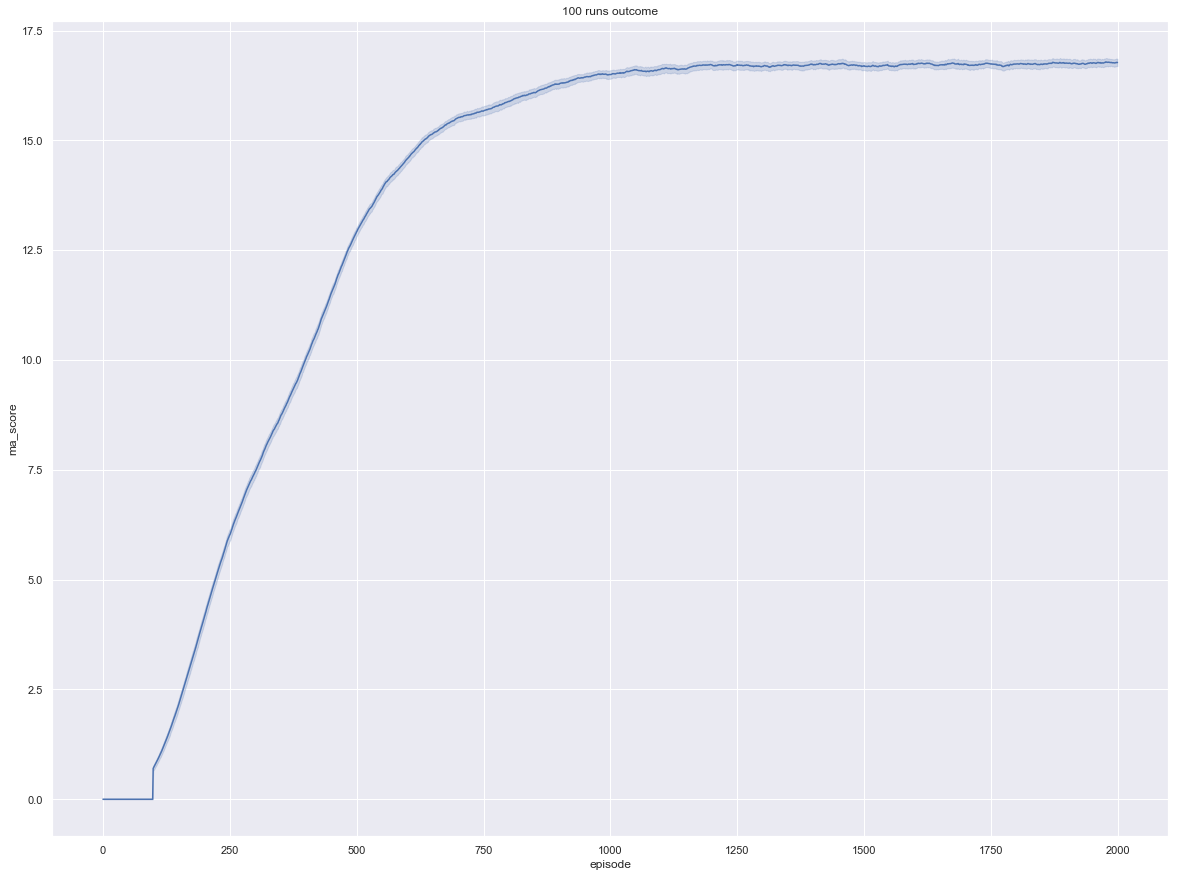

In [8]:
plt = sb.lineplot(
    data = df, 
    x = 'episode', 
    y = 'ma_score', 
    hue_norm = LogNorm()
)
plt.set_title("100 runs moving average outcome")


/Users/alexeykuntsevich/.local/share/virtualenvs/drlnd_p1_navigation-qvE2RYbA/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, '100 runs raw outcome')

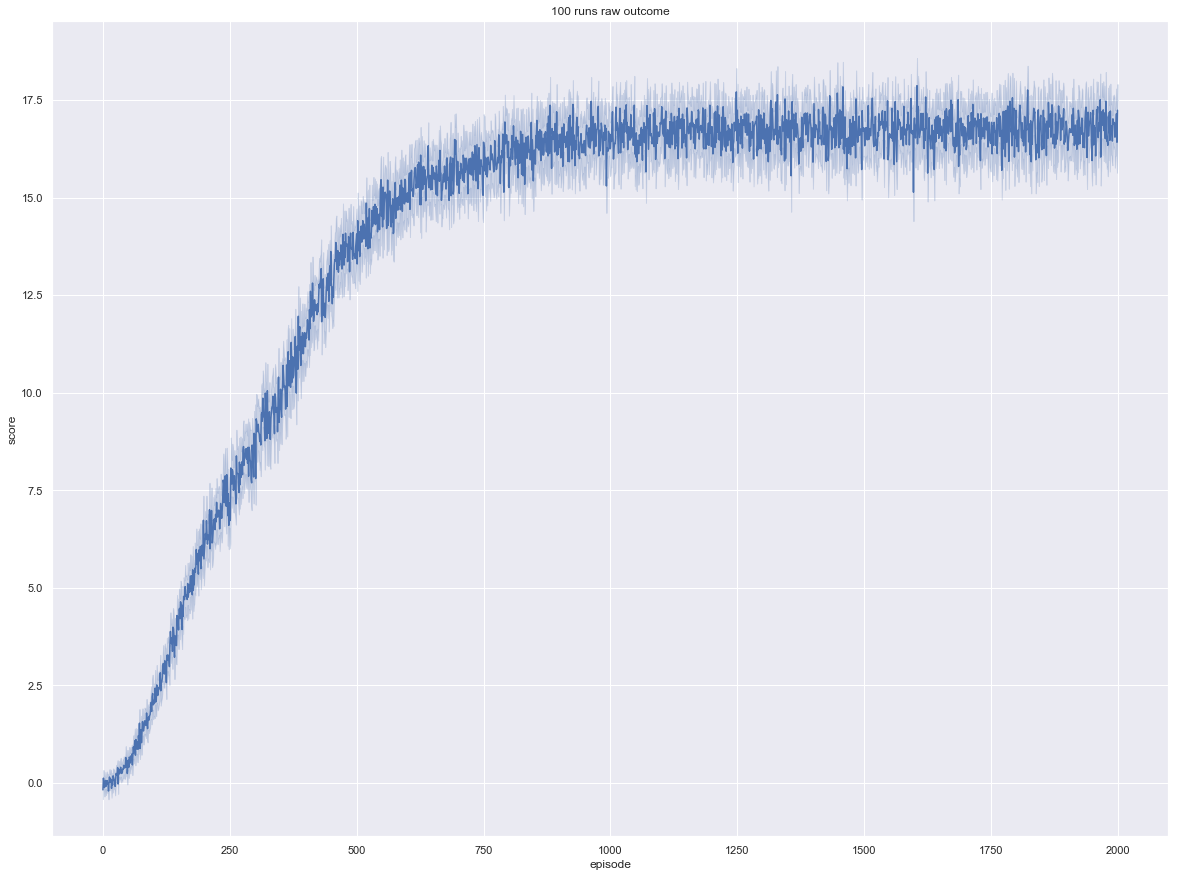

In [9]:
plt = sb.lineplot(
    data = df, 
    x = 'episode', 
    y = 'score', 
    hue_norm = LogNorm()
)
plt.set_title("100 runs raw outcome")

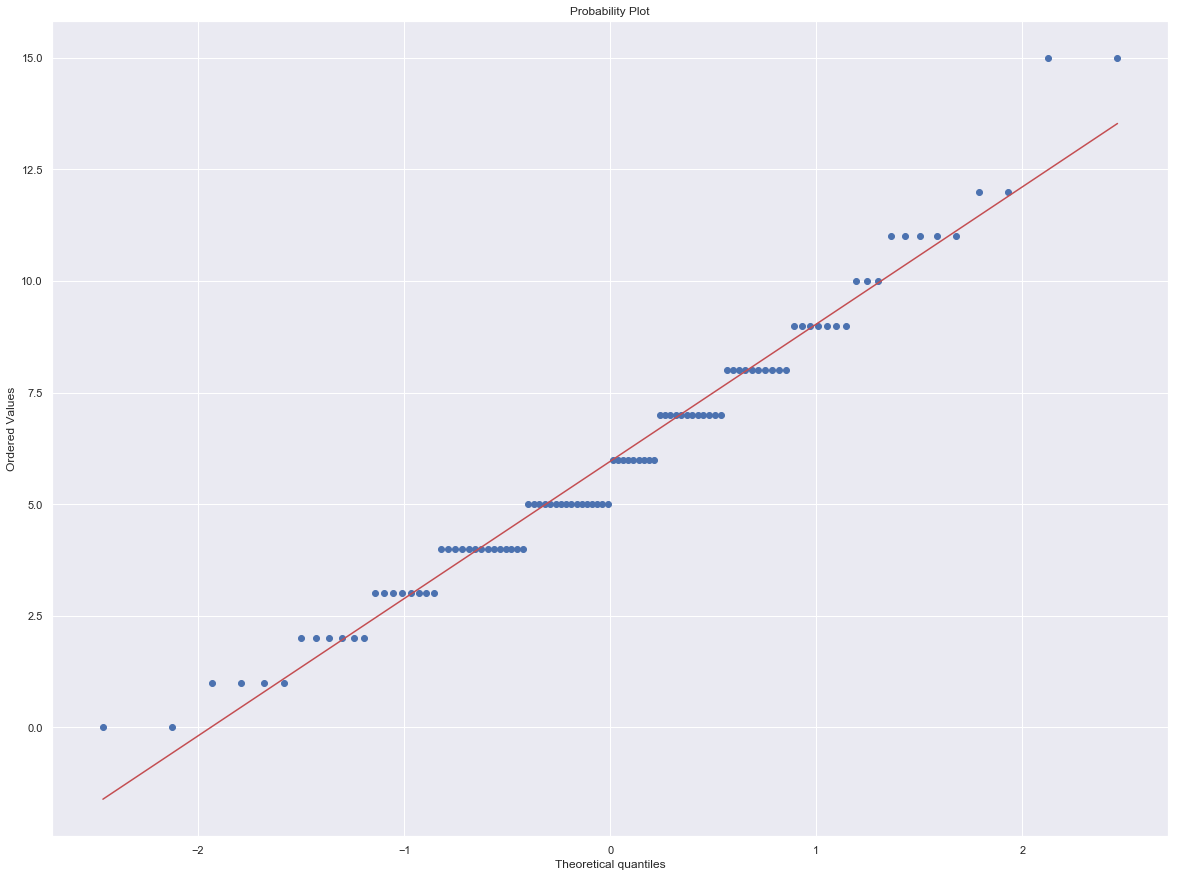

NormaltestResult(statistic=4.969762295076651, pvalue=0.08333545854790492)

In [26]:
step_200_raw_values = df_raw.iloc[200]
measurements = step_200_raw_values
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()
stats.normaltest(step_200_raw_values)

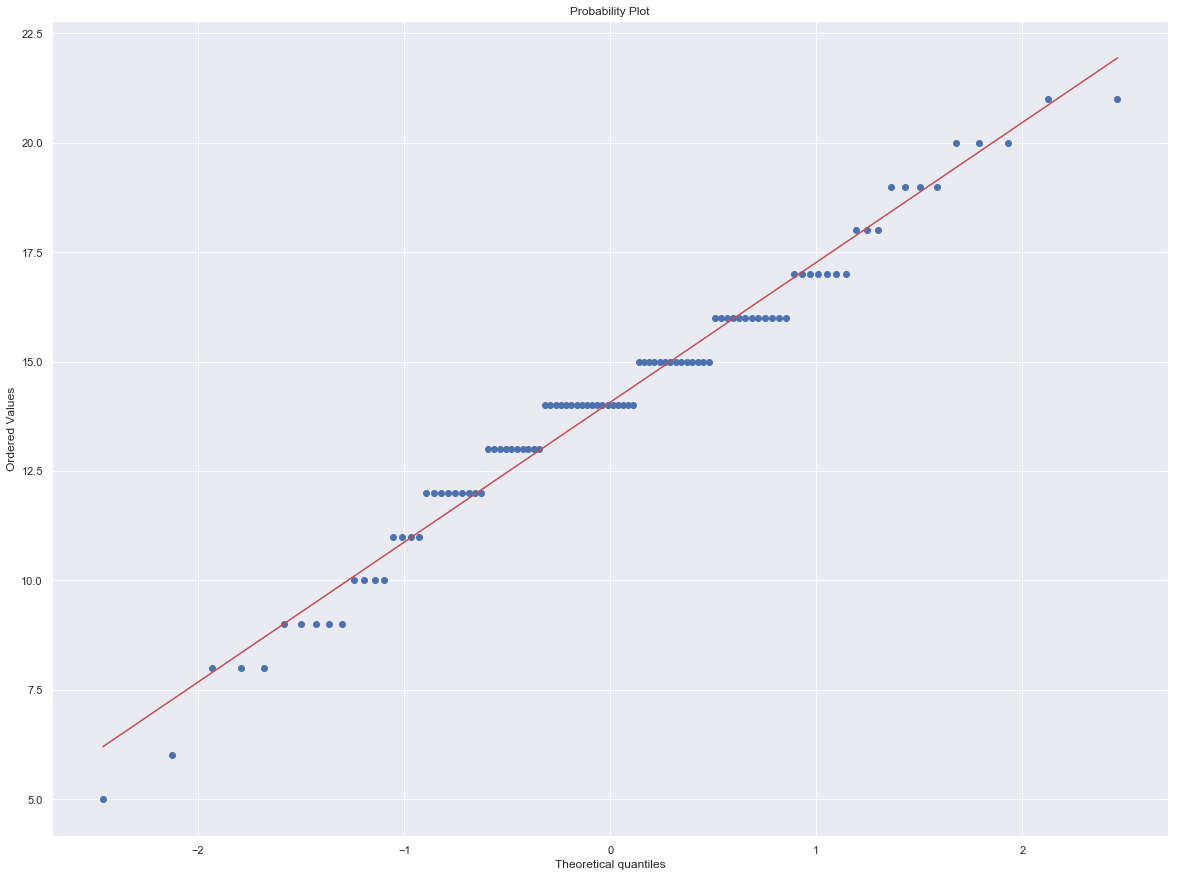

NormaltestResult(statistic=1.8212402482709882, pvalue=0.40227468642733466)

In [27]:
step_500_raw_values = df_raw.iloc[500]
measurements = step_500_raw_values
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()
stats.normaltest(step_500_raw_values)

/Users/alexeykuntsevich/.local/share/virtualenvs/drlnd_p1_navigation-qvE2RYbA/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


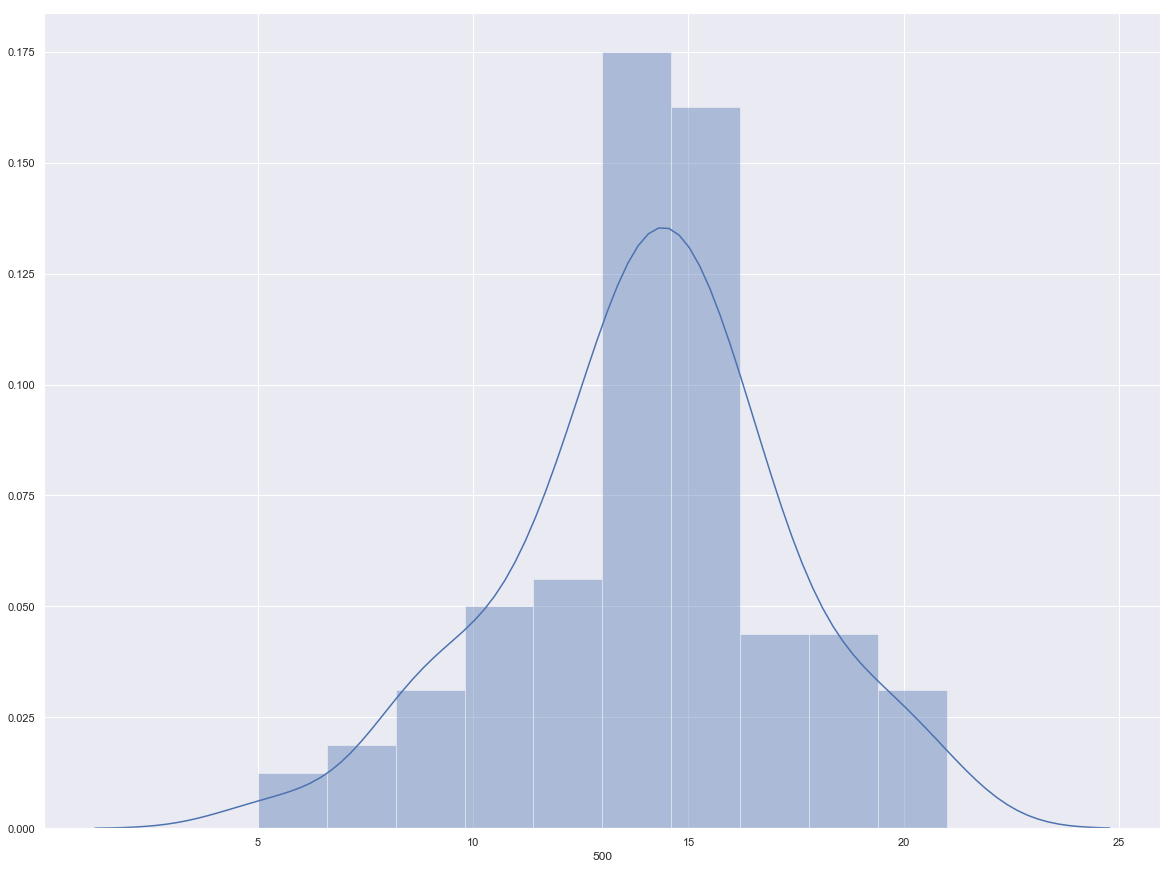

In [30]:
sb.distplot(step_500_raw_values)

In [43]:
df_raw_ma = pd.DataFrame()
for i in range(100):
    df_raw_ma[i] = df_raw[i].rolling(window = 100).mean().fillna(0)

In [45]:
df_raw_ma

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


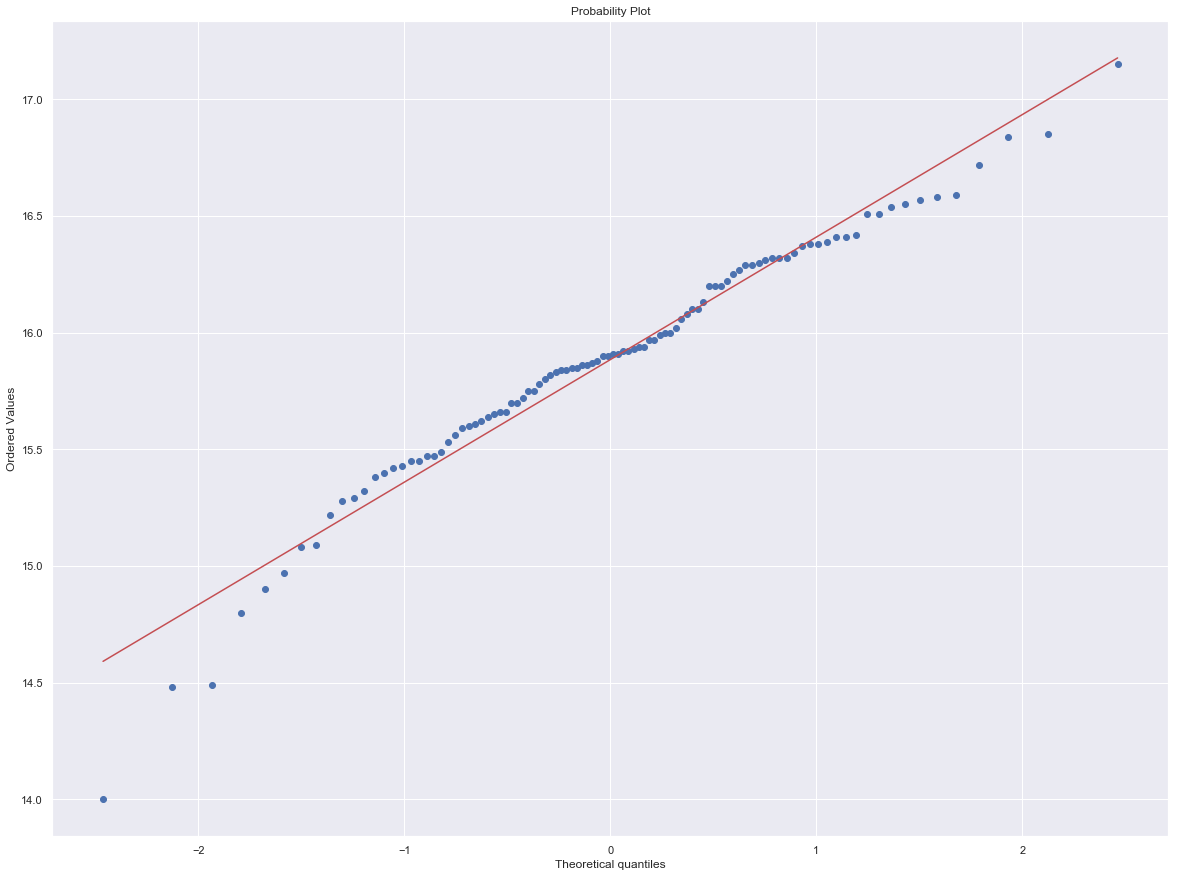

NormaltestResult(statistic=12.248598370717872, pvalue=0.0021890246812946803)

In [59]:
step_ma_values = df_raw_ma.iloc[800]
measurements = step_ma_values
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()
stats.normaltest(step_ma_values)

/Users/alexeykuntsevich/.local/share/virtualenvs/drlnd_p1_navigation-qvE2RYbA/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


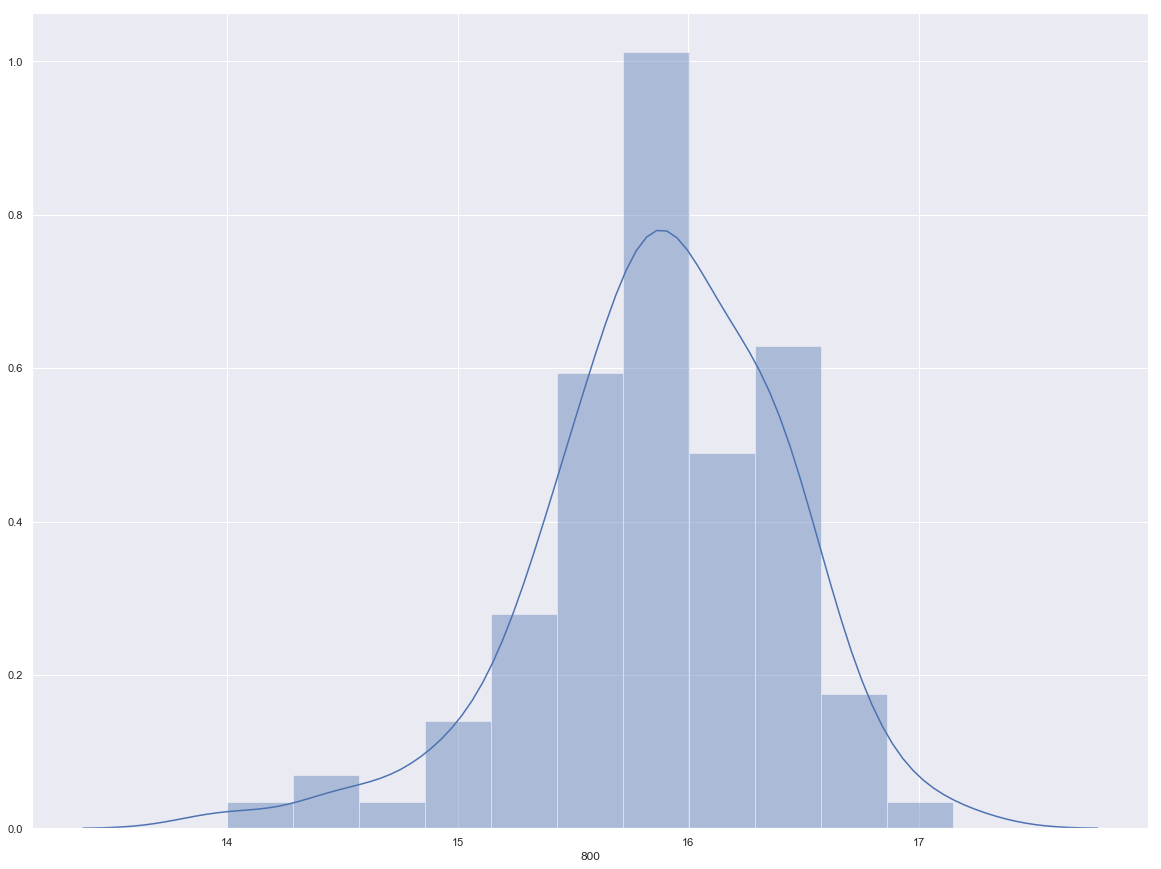

In [60]:
sb.distplot(step_ma_values)

In [48]:
pvals = []
for i in range(2000):
    _, p = stats.normaltest(df_raw_ma.iloc[i])
    pvals.append(p)

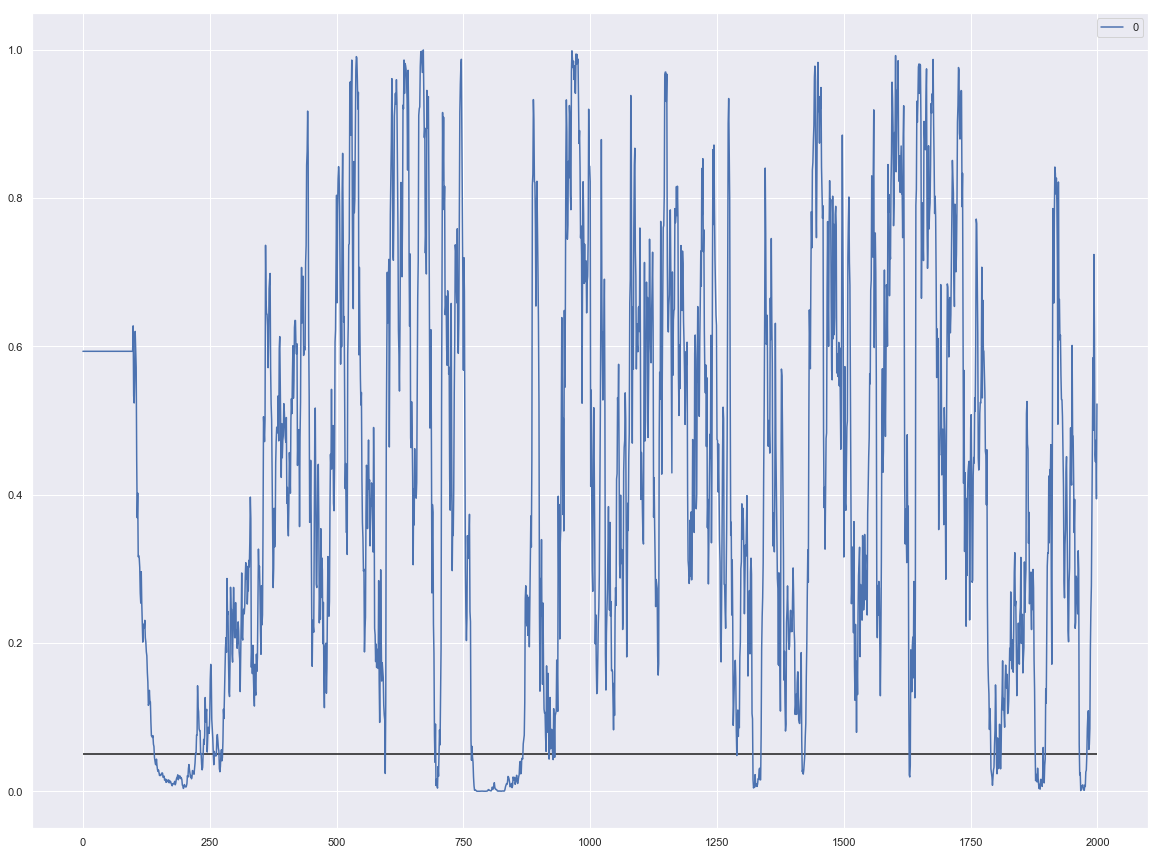

In [57]:
plt = sb.lineplot(data=pd.DataFrame(pvals))
plt.hlines(0.05, 0, 2000)